Last Updated: 7-29-2017

# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Geometric-Manipulations" data-toc-modified-id="Geometric-Manipulations-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Geometric Manipulations</a></div><div class="lev1 toc-item"><a href="#Examples-of-Geometric-Manipulations" data-toc-modified-id="Examples-of-Geometric-Manipulations-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Examples of Geometric Manipulations</a></div><div class="lev2 toc-item"><a href="#Constructive-Methods" data-toc-modified-id="Constructive-Methods-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Constructive Methods</a></div><div class="lev3 toc-item"><a href="#GeoSeries.buffer(distance,-resolution=16)" data-toc-modified-id="GeoSeries.buffer(distance,-resolution=16)-211"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span><code>GeoSeries.buffer(distance, resolution=16)</code></a></div><div class="lev3 toc-item"><a href="#GeoSeries.boundary" data-toc-modified-id="GeoSeries.boundary-212"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span><code>GeoSeries.boundary</code></a></div><div class="lev3 toc-item"><a href="#GeoSeries.centroid" data-toc-modified-id="GeoSeries.centroid-213"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span><code>GeoSeries.centroid</code></a></div><div class="lev3 toc-item"><a href="#GeoSeries.convex_hull" data-toc-modified-id="GeoSeries.convex_hull-214"><span class="toc-item-num">2.1.4&nbsp;&nbsp;</span><code>GeoSeries.convex_hull</code></a></div><div class="lev3 toc-item"><a href="#GeoSeries.envelope" data-toc-modified-id="GeoSeries.envelope-215"><span class="toc-item-num">2.1.5&nbsp;&nbsp;</span><code>GeoSeries.envelope</code></a></div><div class="lev3 toc-item"><a href="#GeoSeries.simplify" data-toc-modified-id="GeoSeries.simplify-216"><span class="toc-item-num">2.1.6&nbsp;&nbsp;</span><code>GeoSeries.simplify</code></a></div><div class="lev3 toc-item"><a href="#GeoSeries.unary_union" data-toc-modified-id="GeoSeries.unary_union-217"><span class="toc-item-num">2.1.7&nbsp;&nbsp;</span><code>GeoSeries.unary_union</code></a></div><div class="lev2 toc-item"><a href="#Affine-Transformations" data-toc-modified-id="Affine-Transformations-22"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Affine Transformations</a></div><div class="lev3 toc-item"><a href="#GeoSeries.rotate(self,-angle,-origin='center',-use_radians=False)" data-toc-modified-id="GeoSeries.rotate(self,-angle,-origin='center',-use_radians=False)-221"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span><code>GeoSeries.rotate(self, angle, origin='center', use_radians=False)</code></a></div><div class="lev3 toc-item"><a href="#GeoSeries.scale(self,-xfact=1.0,-yfact=1.0,-zfact=1.0,-origin='center')" data-toc-modified-id="GeoSeries.scale(self,-xfact=1.0,-yfact=1.0,-zfact=1.0,-origin='center')-222"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span><code>GeoSeries.scale(self, xfact=1.0, yfact=1.0, zfact=1.0, origin='center')</code></a></div><div class="lev3 toc-item"><a href="#GeoSeries.skew(self,-angle,-origin='center',-use_radians=False)" data-toc-modified-id="GeoSeries.skew(self,-angle,-origin='center',-use_radians=False)-223"><span class="toc-item-num">2.2.3&nbsp;&nbsp;</span><code>GeoSeries.skew(self, angle, origin='center', use_radians=False)</code></a></div><div class="lev3 toc-item"><a href="#GeoSeries.translate(self,-angle,-origin='center',-use_radians=False)" data-toc-modified-id="GeoSeries.translate(self,-angle,-origin='center',-use_radians=False)-224"><span class="toc-item-num">2.2.4&nbsp;&nbsp;</span><code>GeoSeries.translate(self, angle, origin='center', use_radians=False)</code></a></div>

# Geometric Manipulations

- Geopandas makes available all the tools for geometric manipulations in the **shapely library**.

# Examples of Geometric Manipulations

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = (16, 20)
from shapely.geometry import Point, Polygon

In [2]:
p1 = Polygon([(0, 0), (1, 0), (1, 1)])
p2 = Polygon([(0, 0), (1, 0), (1, 1), (0, 1)])
p3 = Polygon([(2, 0), (3, 0), (3, 1), (2, 1)])

In [3]:
g = gpd.GeoSeries([p1, p2, p3])
g

0         POLYGON ((0 0, 1 0, 1 1, 0 0))
1    POLYGON ((0 0, 1 0, 1 1, 0 1, 0 0))
2    POLYGON ((2 0, 3 0, 3 1, 2 1, 2 0))
dtype: object

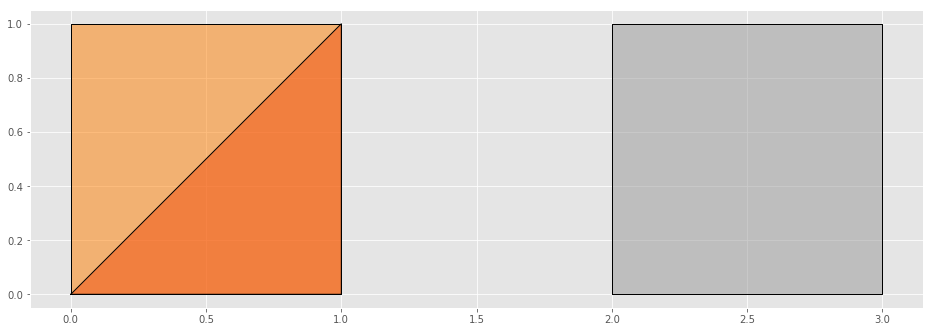

In [4]:
g.plot();

- Some geographical operations return normal pandas object.
- The ```area``` property of a ```GeoSeries``` will return a ```pandas.Series``` containing the area of each item in the GeoSeries:

In [5]:
g.area

0    0.5
1    1.0
2    1.0
dtype: float64

## Constructive Methods

###  ```GeoSeries.buffer(distance, resolution=16)```

Returns a ```GeoSeries``` of geometries representing all points within a given distance of each geometric object.

In [6]:
b = g.buffer(0.5)
b

0    POLYGON ((-0.3535533905932737 0.35355339059327...
1    POLYGON ((-0.5 0, -0.5 1, -0.4975923633360985 ...
2    POLYGON ((1.5 0, 1.5 1, 1.502407636663901 1.04...
dtype: object

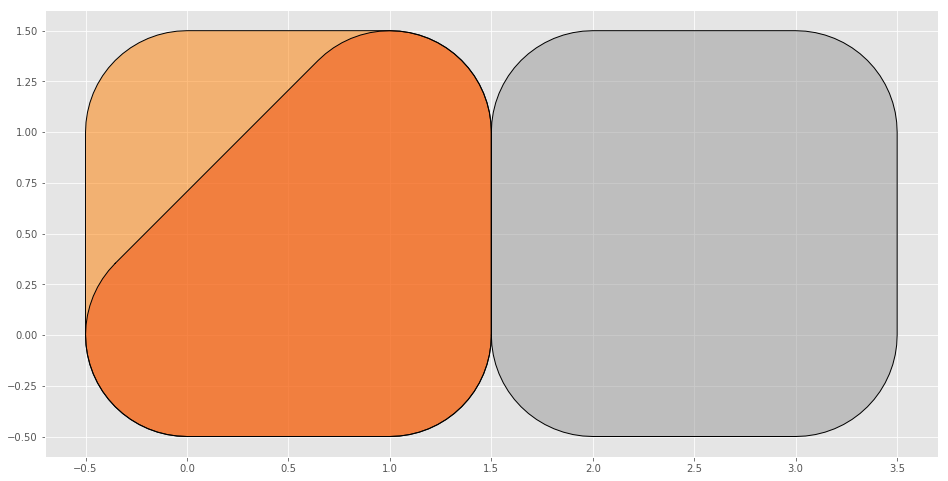

In [7]:
b.plot()

### ```GeoSeries.boundary```
Returns a ```GeoSeries``` of lower dimensional objects representing each geometries' set-theoretic boundary.

In [8]:
boundary = g.boundary

In [9]:
boundary

0         LINESTRING (0 0, 1 0, 1 1, 0 0)
1    LINESTRING (0 0, 1 0, 1 1, 0 1, 0 0)
2    LINESTRING (2 0, 3 0, 3 1, 2 1, 2 0)
dtype: object

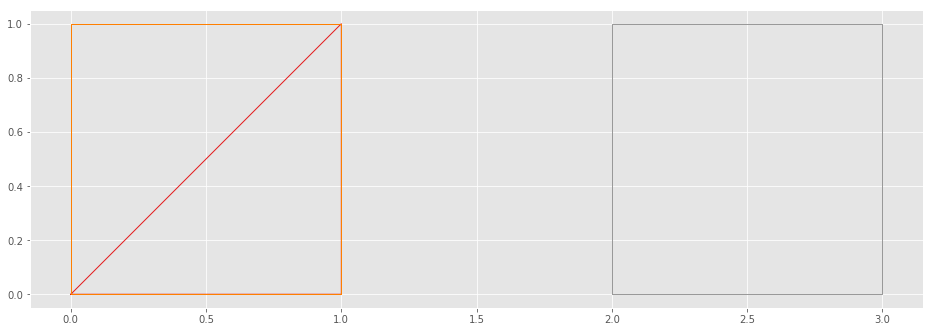

In [10]:
boundary.plot()

### ```GeoSeries.centroid```
Returns a ```GeoSeries``` of points for each points for each geometric centroid.

In [11]:
centroid = g.centroid
centroid

0    POINT (0.6666666666666666 0.3333333333333333)
1                                  POINT (0.5 0.5)
2                                  POINT (2.5 0.5)
dtype: object

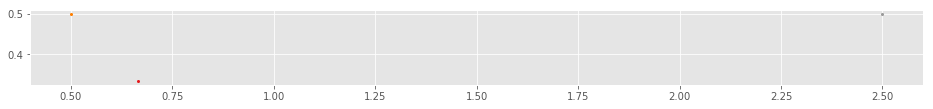

In [12]:
centroid.plot()

### ```GeoSeries.convex_hull```
Returns a ```GeoSeries``` of geometries representing the smallest convex Polygon containing all the points in each object unless the number of points in the object is less than three.

In [13]:
convex_hull = g.convex_hull
convex_hull

0         POLYGON ((0 0, 1 1, 1 0, 0 0))
1    POLYGON ((0 0, 0 1, 1 1, 1 0, 0 0))
2    POLYGON ((2 0, 2 1, 3 1, 3 0, 2 0))
dtype: object

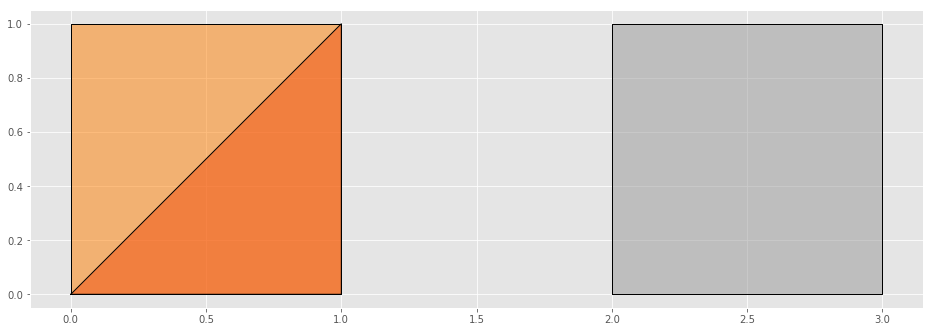

In [14]:
convex_hull.plot()

### ```GeoSeries.envelope```
Returns a ```GeoSeries``` of geometries or smallest rectangular polygon (with sides parallel to the coordinate axes) that contains each object.

In [15]:
envelope = g.envelope
envelope

0    POLYGON ((0 0, 1 0, 1 1, 0 1, 0 0))
1    POLYGON ((0 0, 1 0, 1 1, 0 1, 0 0))
2    POLYGON ((2 0, 3 0, 3 1, 2 1, 2 0))
dtype: object

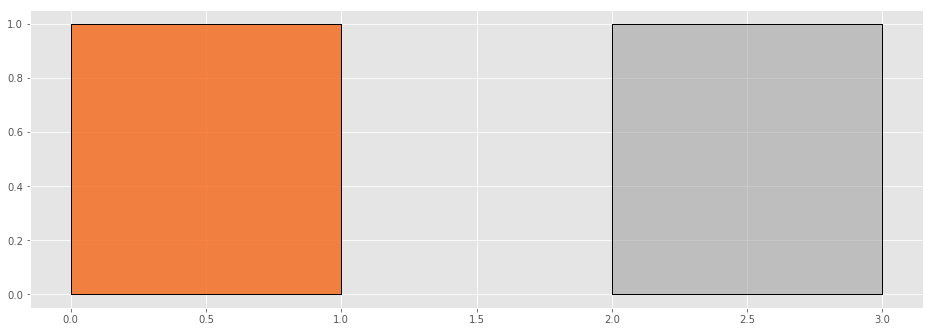

In [16]:
envelope.plot()

### ```GeoSeries.simplify```
Returns a ```GeoSeries``` containing a simplified representation of each object.


In [17]:
simplify = g.simplify(tolerance=0, preserve_topology=True)
simplify

0         POLYGON ((0 0, 1 0, 1 1, 0 0))
1    POLYGON ((0 0, 1 0, 1 1, 0 1, 0 0))
2    POLYGON ((2 0, 3 0, 3 1, 2 1, 2 0))
dtype: object

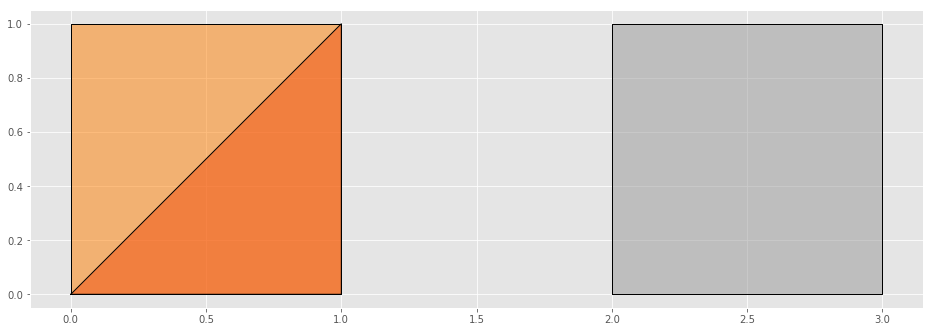

In [18]:
simplify.plot()

### ```GeoSeries.unary_union```
Return a geometry containing the union of all geometries in the ```GeoSeries```.

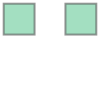

In [19]:
unary = g.unary_union
unary

## Affine Transformations

### ```GeoSeries.rotate(self, angle, origin='center', use_radians=False)```
Rotate the coordinates of the GeoSeries.

In [20]:
rotated = g.rotate(60)
rotated

0    POLYGON ((0.6830127018922192 -0.18301270189221...
1    POLYGON ((0.6830127018922192 -0.18301270189221...
2    POLYGON ((2.68301270189222 -0.1830127018922192...
dtype: object

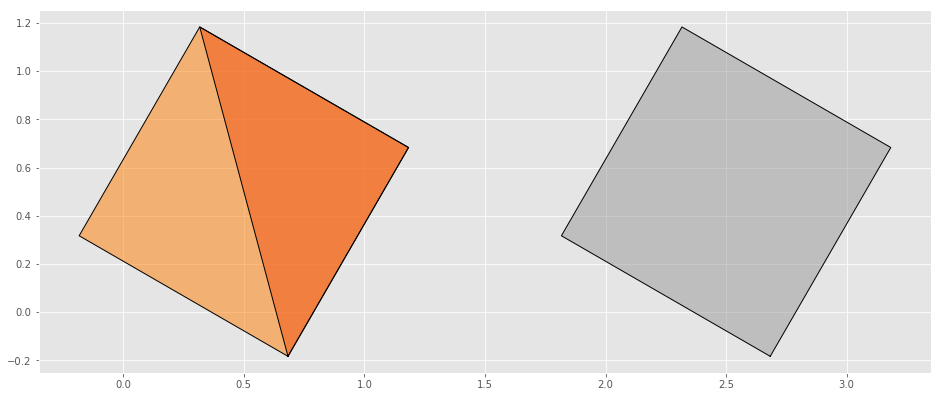

In [21]:
rotated.plot()

### ```GeoSeries.scale(self, xfact=1.0, yfact=1.0, zfact=1.0, origin='center')```
Scale the geometries of the GeoSeries along each (x, y, z) dimensions.

In [22]:
scaled = g.scale(xfact=2.0)
scaled

0            POLYGON ((-0.5 0, 1.5 0, 1.5 1, -0.5 0))
1    POLYGON ((-0.5 0, 1.5 0, 1.5 1, -0.5 1, -0.5 0))
2       POLYGON ((1.5 0, 3.5 0, 3.5 1, 1.5 1, 1.5 0))
dtype: object

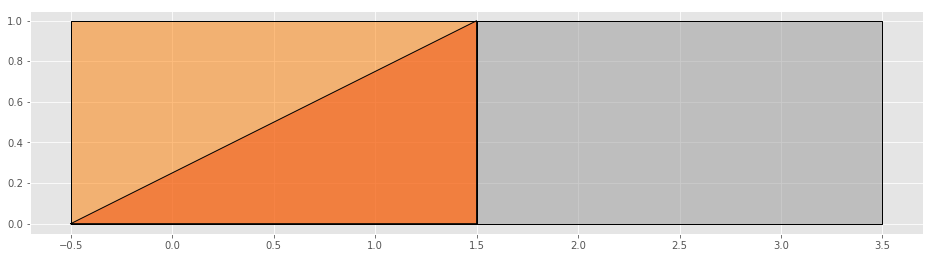

In [23]:
scaled.plot()

### ```GeoSeries.skew(self, angle, origin='center', use_radians=False)```
Shear/Skew the geometries of the GeoSeries by angles along x, and y dimensions.

In [24]:
skewed = g.skew(-50)
skewed

0    POLYGON ((0.595876796297105 0, 1.5958767962971...
1    POLYGON ((0.595876796297105 0, 1.5958767962971...
2    POLYGON ((2.595876796297105 0, 3.5958767962971...
dtype: object

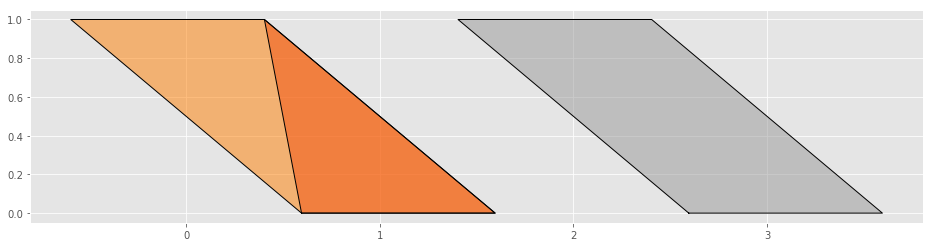

In [25]:
skewed.plot()

### ```GeoSeries.translate(self, angle, origin='center', use_radians=False)```
Shift the coordinates of the GeoSeries

In [26]:
translated = g.translate(20)
translated

0          POLYGON ((20 0, 21 0, 21 1, 20 0))
1    POLYGON ((20 0, 21 0, 21 1, 20 1, 20 0))
2    POLYGON ((22 0, 23 0, 23 1, 22 1, 22 0))
dtype: object

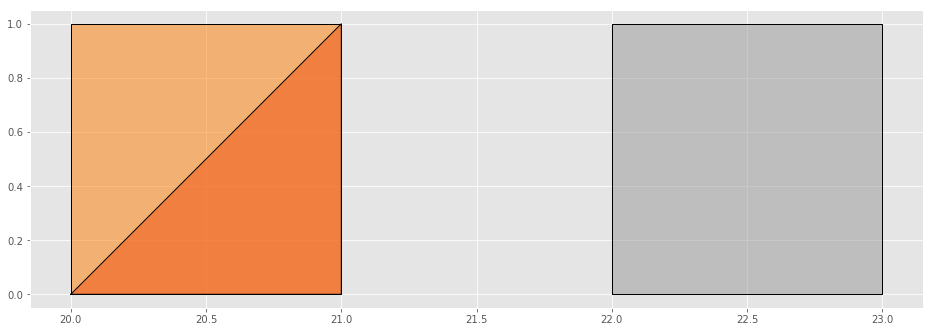

In [27]:
translated.plot()

GeoPandas objects also implement alternate constructors that can read any data format recognized by **Fiona**.

To read a file containing the [boroughs of New York City](http://www1.nyc.gov/site/planning/data-maps/open-data/bytes-archive.page):


In [48]:
boros = gpd.GeoDataFrame.from_file('/home/abanihi/Documents/climate-data/shapefile/nybb_17a/')
boros.head()

BoroCode       BoroName    Shape_Area     Shape_Leng  \
0         3       Brooklyn  1.937487e+09  741109.427047   
1         4         Queens  3.044829e+09  895714.759861   
2         5  Staten Island  1.623819e+09  330476.026530   
3         1      Manhattan  6.364538e+08  358410.635285   
4         2          Bronx  1.186816e+09  464081.178241   

                                            geometry  
0  (POLYGON ((1021176.479003906 151374.7969970703...  
1  (POLYGON ((1029606.076599121 156073.8142089844...  
2  (POLYGON ((970217.0223999023 145643.3322143555...  
3  (POLYGON ((981219.0557861328 188655.3157958984...  
4  (POLYGON ((1012821.805786133 229228.2645874023...

In [50]:
boros.set_index('BoroCode', inplace=True)
boros

BoroName    Shape_Area     Shape_Leng  \
BoroCode                                               
3              Brooklyn  1.937487e+09  741109.427047   
4                Queens  3.044829e+09  895714.759861   
5         Staten Island  1.623819e+09  330476.026530   
1             Manhattan  6.364538e+08  358410.635285   
2                 Bronx  1.186816e+09  464081.178241   

                                                   geometry  
BoroCode                                                     
3         (POLYGON ((1021176.479003906 151374.7969970703...  
4         (POLYGON ((1029606.076599121 156073.8142089844...  
5         (POLYGON ((970217.0223999023 145643.3322143555...  
1         (POLYGON ((981219.0557861328 188655.3157958984...  
2         (POLYGON ((1012821.805786133 229228.2645874023...

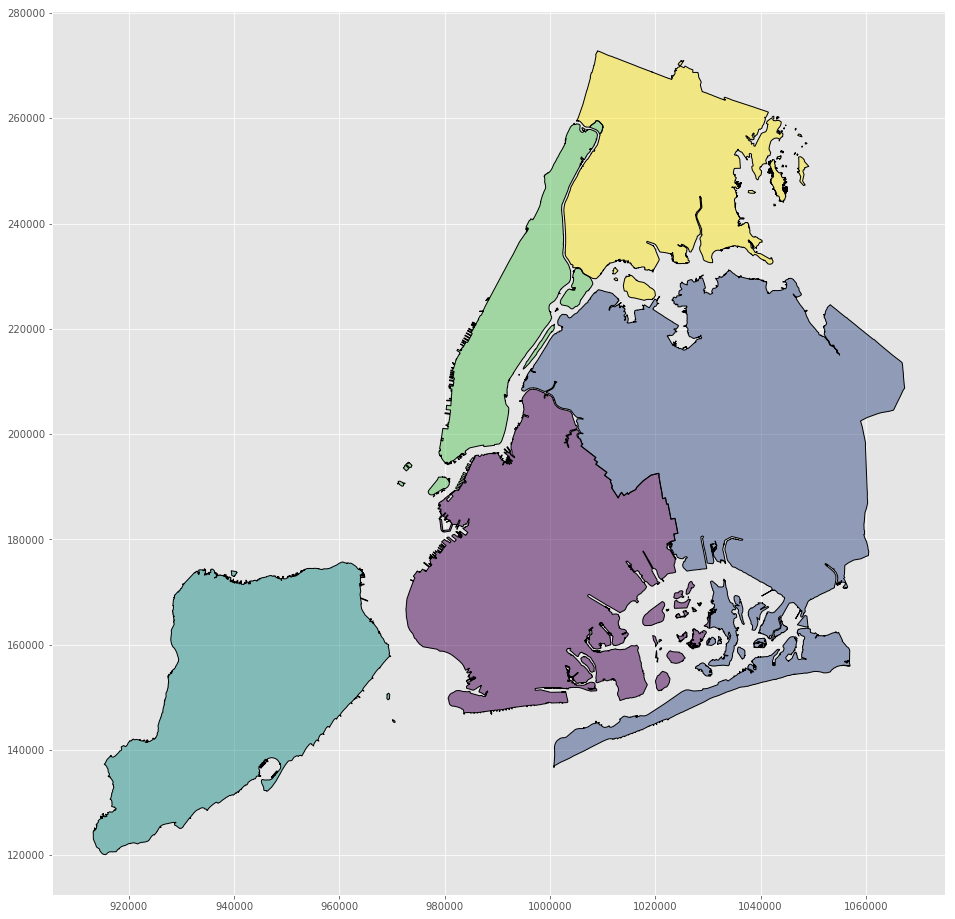

In [51]:
boros.plot()

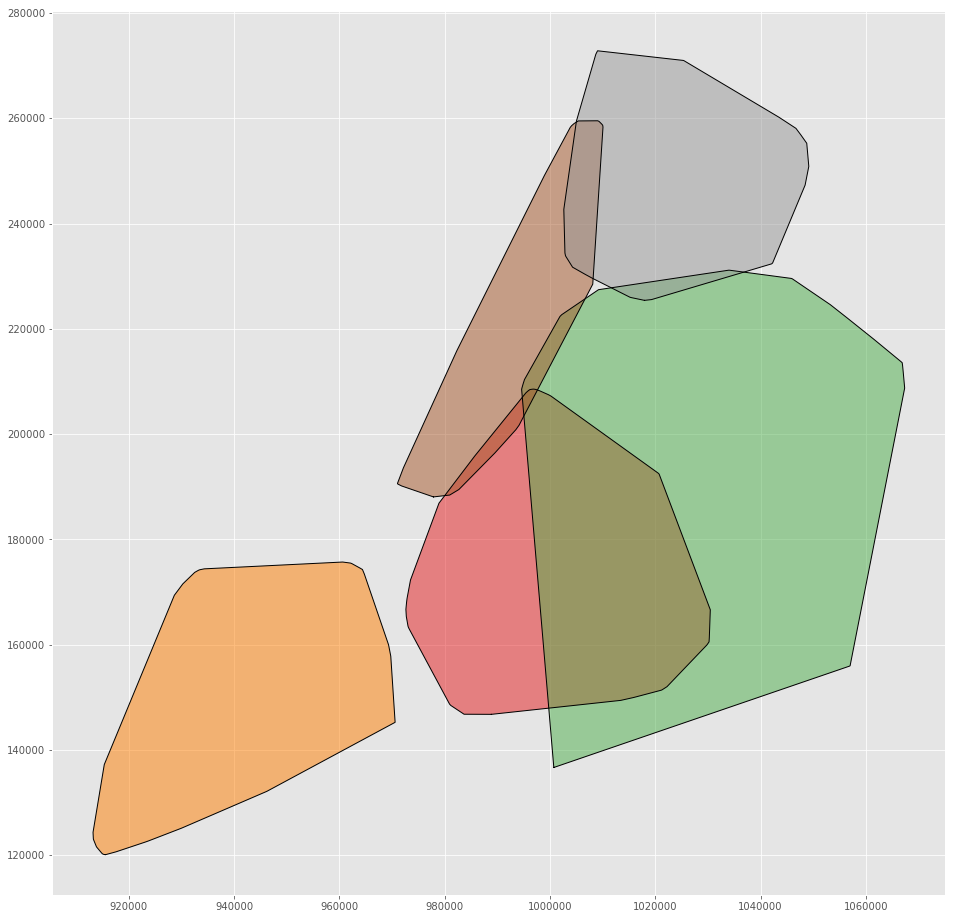

In [53]:
boros['geometry'].convex_hull.plot();

 - To demonstrate a more complex operation, we will generate a ```GeoSeries``` containing 2000 random points.

In [55]:
from shapely.geometry import Point
import numpy as np

In [57]:
xmin, xmax, ymin, ymax = 900000, 1080000, 120000, 280000
xc = (xmax - xmin) * np.random.random(2000) + xmin
yc = (ymax - ymin) * np.random.random(2000) + ymin

In [58]:
pts = gpd.GeoSeries([Point(x, y) for x, y in zip(xc, yc)])

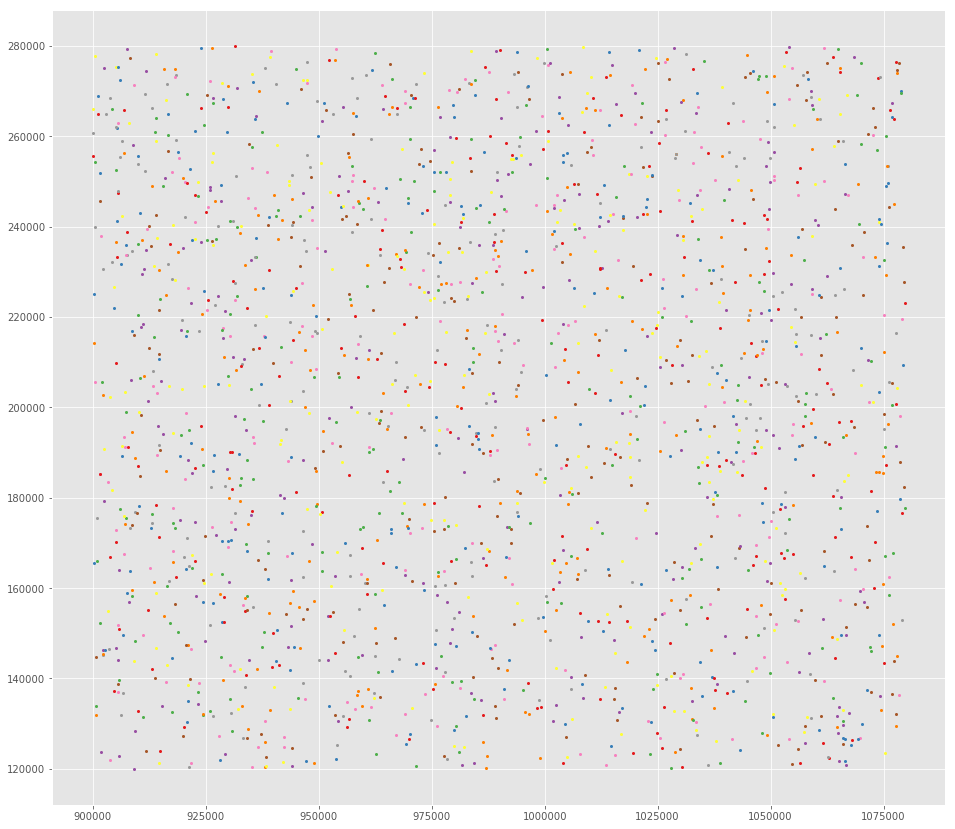

In [59]:
pts.plot()

- Now Draw a circle with fixed radius around each point


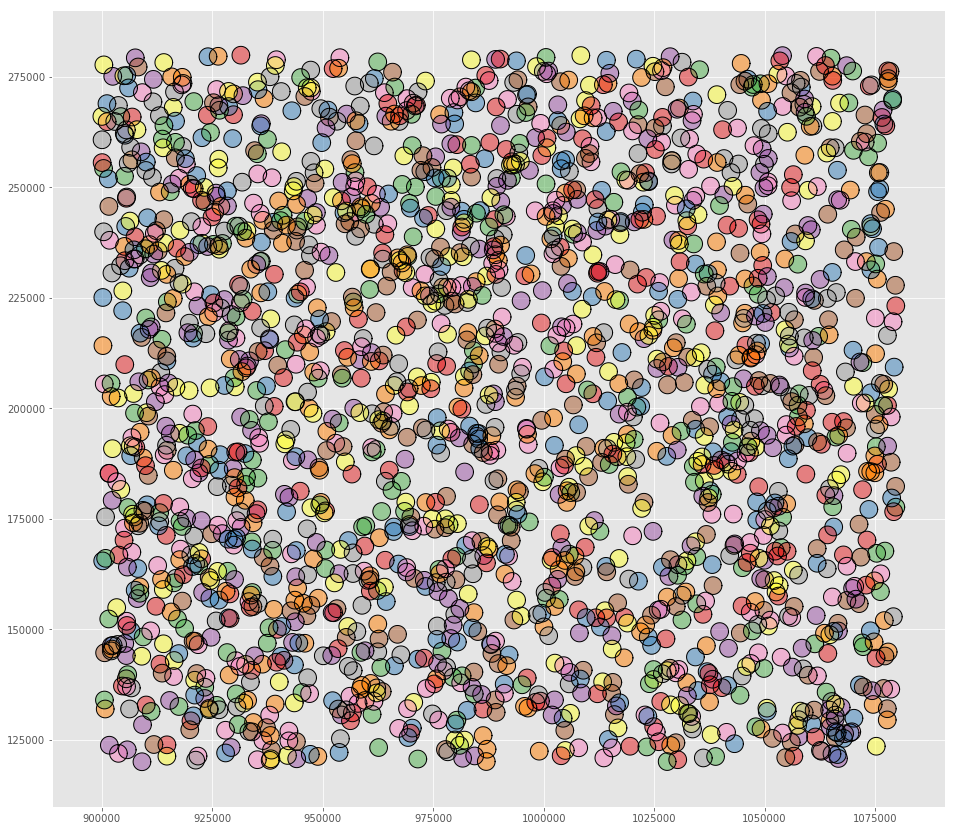

In [60]:
circles = pts.buffer(2000)
circles.plot()

- We can collapse these circles into a single shapely shapely MultiPolygon geometry with

In [62]:
mp = circles.unary_union
mp

- To extract the part of this geometry contained in each borough, we can just use:

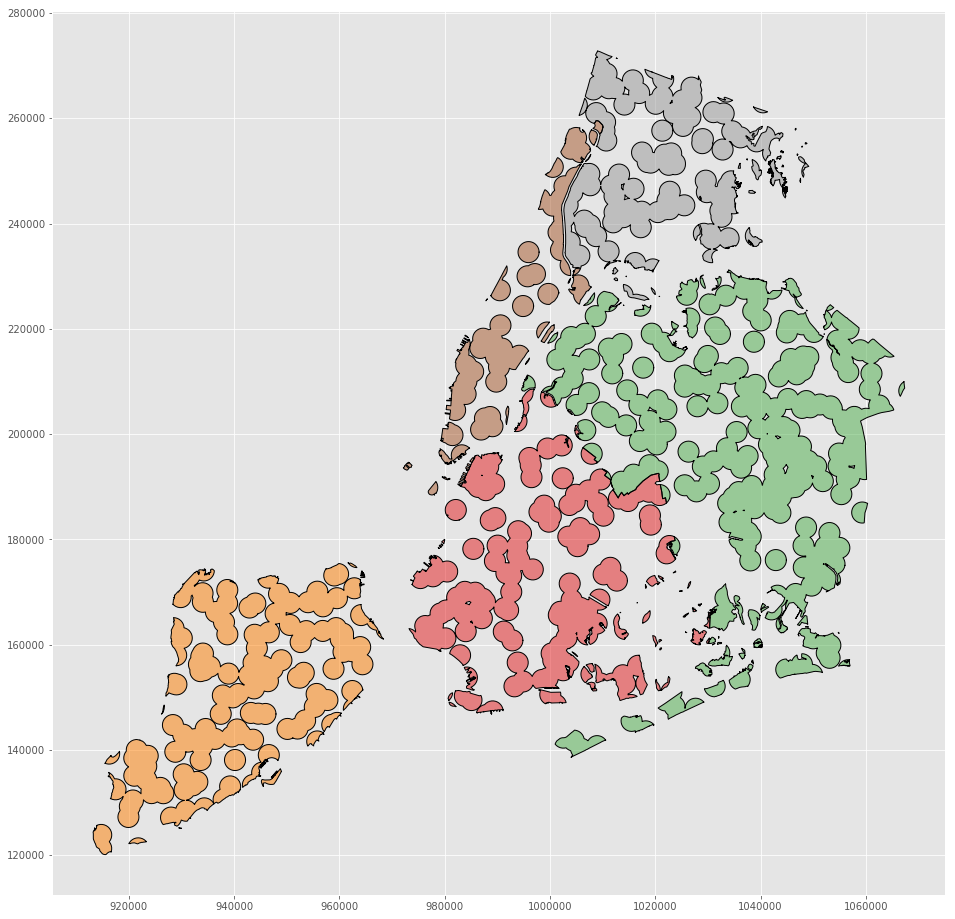

In [64]:
holes = boros['geometry'].intersection(mp);
holes; holes.plot();

 - To get the area outside of the holes:

In [65]:
boros_with_holes = boros['geometry'].difference(mp)
boros_with_holes

BoroCode
3    (POLYGON ((1021111.562373814 151357.7137418261...
4    (POLYGON ((1035872.604767843 158248.3799729727...
5    (POLYGON ((970217.0223999023 145643.3322143555...
1    (POLYGON ((981219.0557861328 188655.3157958984...
2    (POLYGON ((1015023.713439941 230286.7592163086...
dtype: object

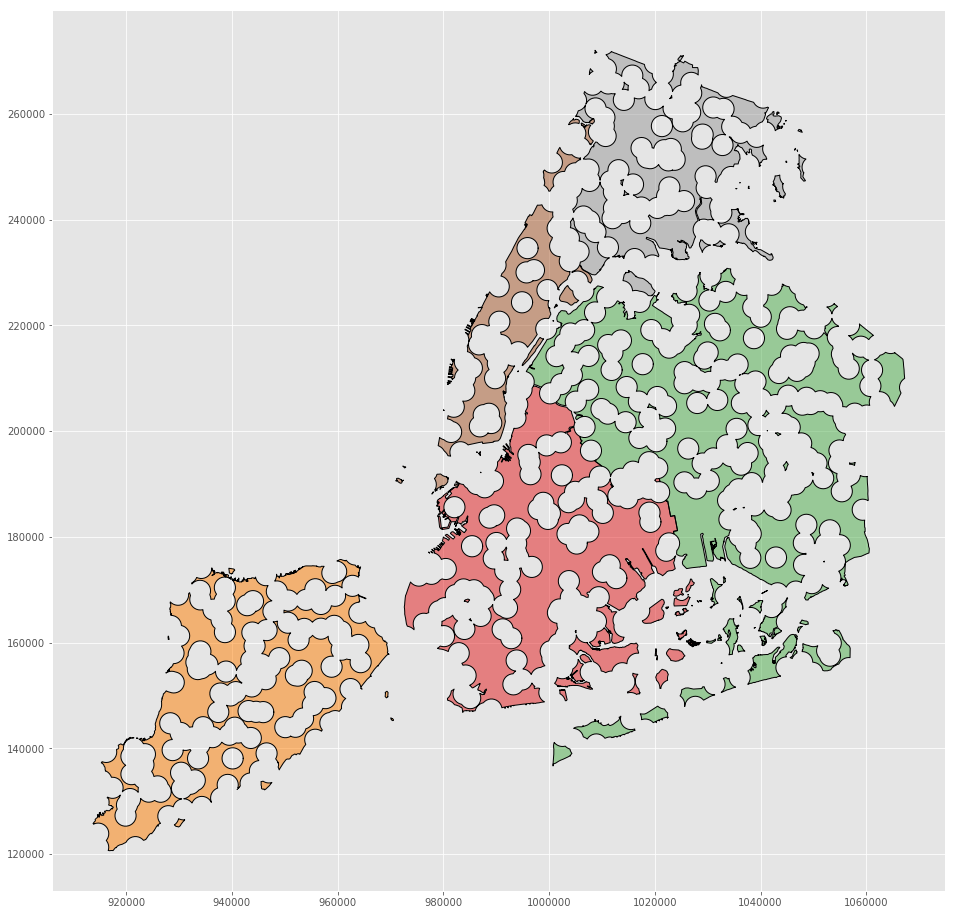

In [66]:
boros_with_holes.plot()

- Note that this can be simplified a bit, since ```geometry``` is available as an attribute on a ```GeoDataFrame```, and the ```intersection``` and ```difference``` methods are implemented with the "&" and "-" operators, respectively.


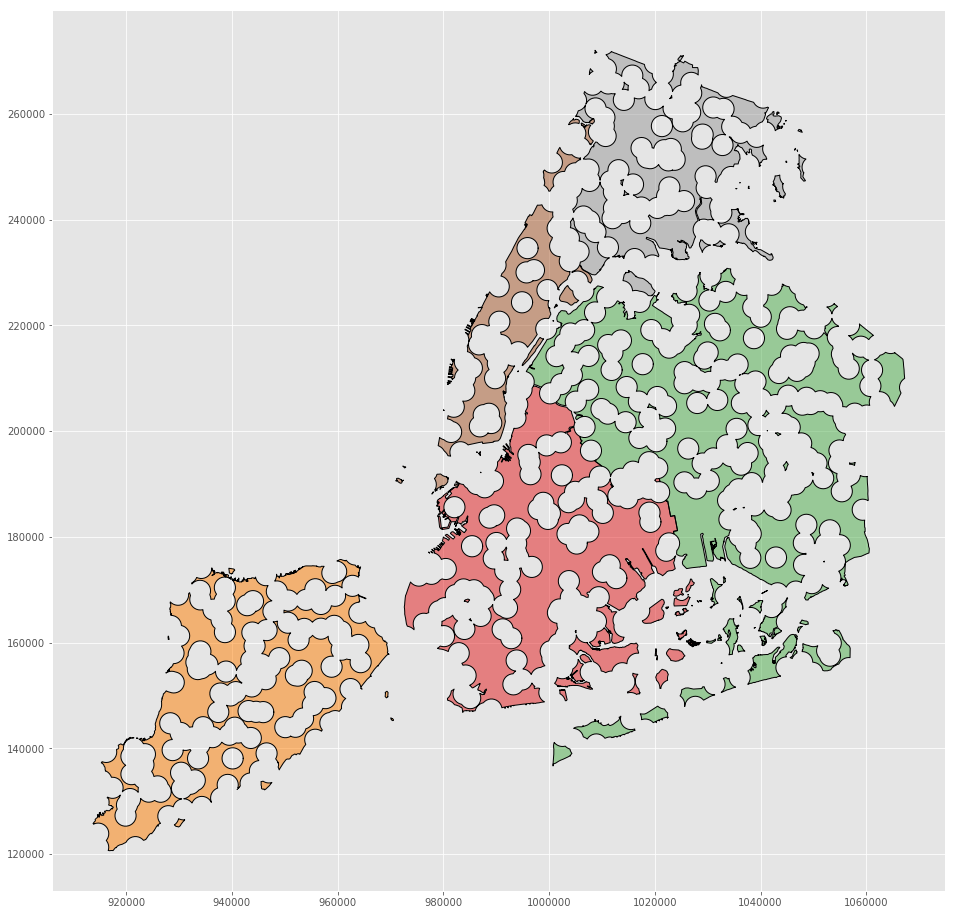

In [68]:
(boros.geometry - mp).plot()

- It is easy to do things like calculate the fractional area in each borough that are in the holes:

In [69]:
holes.area / boros.geometry.area

BoroCode
3    0.508361
4    0.596734
5    0.617645
1    0.584483
2    0.599632
dtype: float64